녹음을 시작합니다...
녹음이 완료되었습니다.


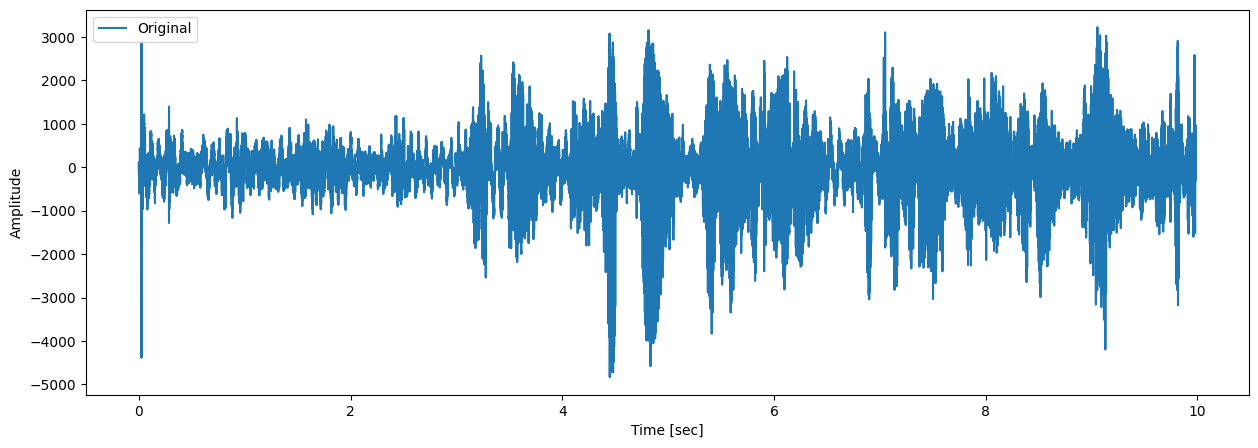

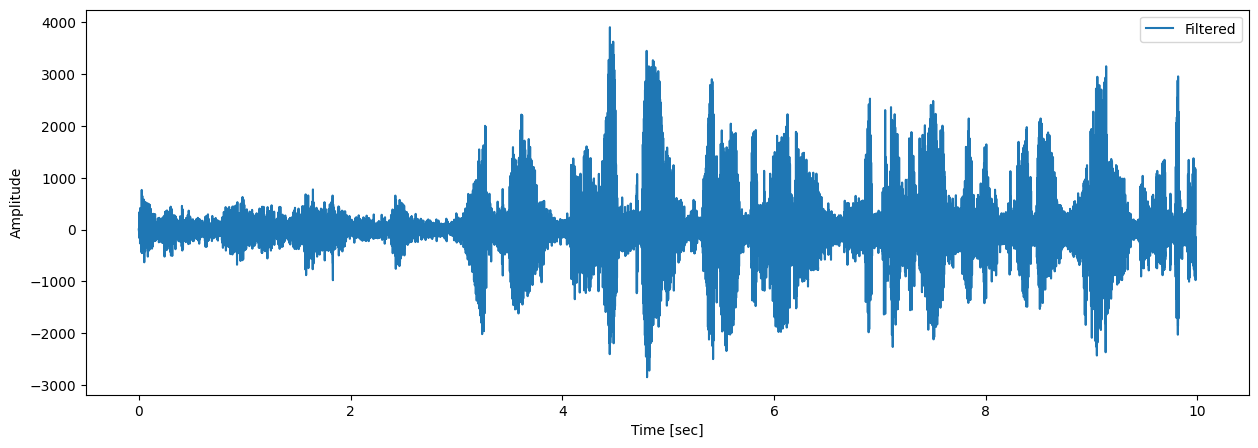

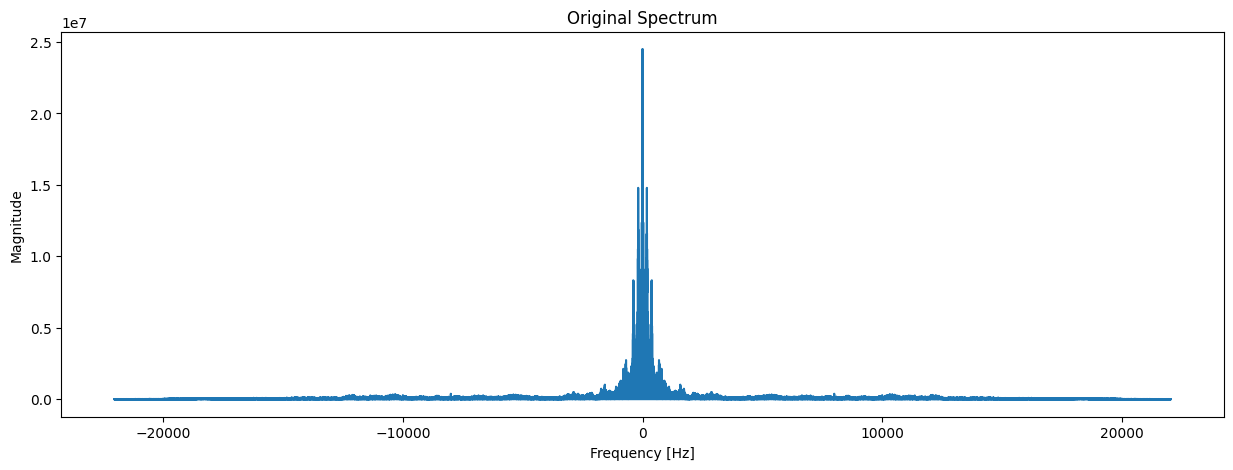

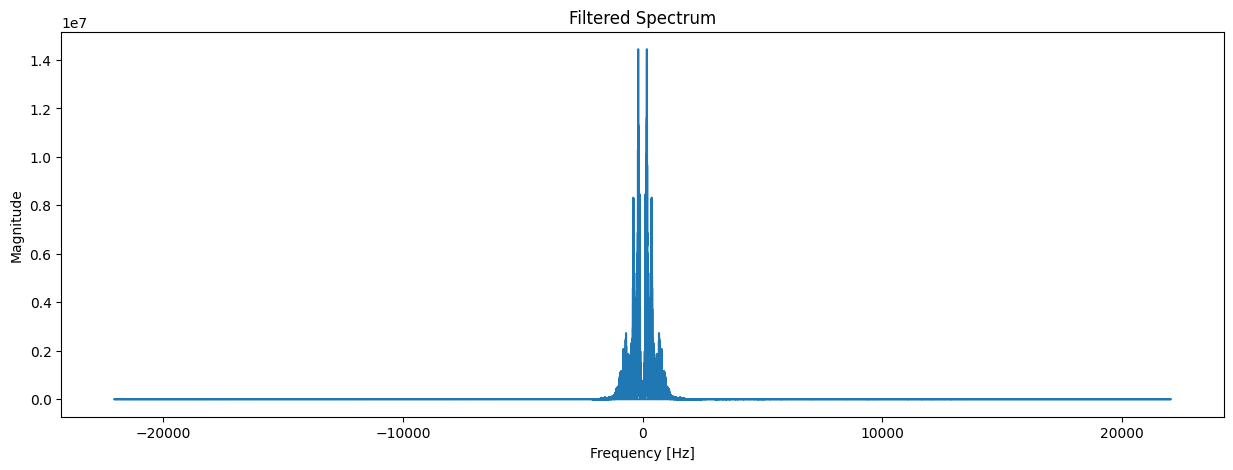

In [10]:
import pyaudio
import wave
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

def record_and_process_audio(record_seconds, output_filename, low_freq, high_freq):
    
    # Record audio
    audio = pyaudio.PyAudio()
    stream = audio.open(format=pyaudio.paInt16, channels=1, rate=44100, input=True, frames_per_buffer=1024)

    print("녹음을 시작합니다...")

    frames = []

    for i in range(0, int(44100 / 1024 * record_seconds)):
        data = stream.read(1024)
        frames.append(data)

    print("녹음이 완료되었습니다.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(output_filename, 'wb')
    waveFile.setnchannels(1)
    waveFile.setsampwidth(audio.get_sample_size(pyaudio.paInt16))
    waveFile.setframerate(44100)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

    # Bandpass filter
    input_file = output_filename
    output_file = "./filtered_" + output_filename

    rate, data = wavfile.read(input_file)
    nyq = 0.5 * rate
    low = low_freq / nyq
    high = high_freq / nyq
    order = 5

    b, a = butter(order, [low, high], btype='band')
    filtered_data = lfilter(b, a, data)
    wavfile.write(output_file, rate, np.asarray(filtered_data, dtype=np.int16))

    # Plot time-domain graphs
    rate1, data1 = wavfile.read(input_file)
    rate2, data2 = wavfile.read(output_file)

    time1 = np.arange(0, len(data1)/rate1, 1/rate1)
    time2 = np.arange(0, len(data2)/rate2, 1/rate2)

    plt.figure(figsize=(15,5))
    plt.plot(time1, data1, label='Original')
    plt.legend()
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(time2, data2, label='Filtered')
    plt.legend()
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot frequency-domain graphs
    freq_data1 = np.fft.fft(data1)
    freq_data2 = np.fft.fft(data2)

    freq1 = np.fft.fftfreq(len(data1), d=1/rate1)
    freq2 = np.fft.fftfreq(len(data2), d=1/rate2)

    plt.figure(figsize=(15,5))
    plt.plot(freq1, np.abs(freq_data1))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.title('Original Spectrum')
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(freq2, np.abs(freq_data2))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.title('Filtered Spectrum')
    plt.show()

# Example usage
record_and_process_audio(record_seconds=10, output_filename="recorded.wav", low_freq=100, high_freq=1000)